In [1]:
# data visualization and utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# classifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.svm import SVR

In [3]:
# evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score

In [4]:
# data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

In [5]:
def convert(row,labels):
    if len(row) != len(labels):
        print('length of row does not match length of labels')
        return 
    else:
        max_value = row[0]
        max_index = 0
        for i in range(len(row)):
            if row[i] > max_value:
                max_value = row[i]
                max_index = i
        return labels[max_index]

In [35]:
def multiclass_regression_report(y_test, y_pred, y_label):
    
    space_tab = 3
    rounds = 3
    
    # convert to numpy array first
    y_test_np = np.array(y_test)
    y_pred_np = np.array(y_pred)
    
    # transpose
    y_test_np_T = y_test_np.T
    y_pred_np_T = y_pred_np.T
    
    if len(y_test_np) != len(y_pred_np):
        return 'length of true labels and predicted labels are not equal.'
    elif len(y_test_np[0]) != len(y_pred_np[0]):
        return 'column of true labels and predicted labels are not equal.'
    elif len(y_test_np[0]) != len(y_label):
        return 'column of true labels and given labels are not equal.'
    
    report = []   
    
    for i in range(len(y_label)):
        test = y_test_np_T[i]
        pred = y_pred_np_T[i]
        label = y_label[i]
        report.append([
            label, 
            round(r2_score(test,pred), rounds), 
            round(mean_squared_error(test, pred),rounds), 
            round(explained_variance_score(test,pred),rounds), 
            sum(test)
        ])
    
    # macro
    macro = [
        'macro avg', 
        round(sum([row[1] for row in report]) / len(y_label),rounds), 
        round(sum([row[2] for row in report]) / len(y_label),rounds), 
        round(sum([row[3] for row in report]) / len(y_label),rounds), 
        sum([row[4] for row in report])
    ]
        
    # micro    
    micro_test = [max(row) for row in y_test_np]
    micro_pred = [max(row) for row in y_pred_np]    
    micro = [
        'micro avg', 
        round(r2_score(micro_test,micro_pred),rounds), 
        round(mean_squared_error(micro_test,micro_pred), rounds),
        round(explained_variance_score(micro_test,micro_pred), rounds),
        len(y_test_np)
    ]
        
    # weighted    
    weighted = [
        'weighted avg', 
        round(sum([row[1]*row[4] for row in report])/micro[4],rounds), 
        round(sum([row[2]*row[4] for row in report])/micro[4],rounds), 
        round(sum([row[3]*row[4] for row in report])/micro[4],rounds), 
        len(y_test_np)
    ]
    
    #formatting
    space = ['    ', '    ', '    ', '    ', '    ']    
    header = ['    ', 'r2_score', 'mean_squared_error', 'explained_variance_score', 'support']
    
    # add all the things    
    report.insert(0,space)
    report.insert(0,header)
    report.append(space)
    report.append(micro)
    report.append(macro)
    report.append(weighted)
    
    result = ''
    
    col = []
    for i in range(len(report[0])):
        col.append(max([len(str(row[i])) for row in report])+space_tab)
    
    for row in report:
        for i in range(len(row)):
            result += str(row[i]).rjust(col[i], ' ')
        result += '\n'
    return result   

In [12]:
loan_raw = pd.read_csv('kiva_loans.csv')

In [13]:
loan_std = pd.read_csv('kiva_loans_standardized.csv')

In [14]:
dataframe_features = list(loan_std.columns)

In [15]:
dataframe_score = ['repayment_interval_bullet','repayment_interval_monthly','repayment_interval_weekly','repayment_interval_irregular']

In [16]:
for i in range(len(dataframe_score)):
    dataframe_features.remove(dataframe_score[i])

In [17]:
X = loan_std[dataframe_features]
y = loan_std[dataframe_score]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [19]:
dtr = DecisionTreeRegressor()

In [20]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [22]:
y_revise = dtr.predict(X_train)

In [23]:
y_labels = ['bullet','monthly','weekly','irregular']

In [36]:
print(multiclass_regression_report(y_train,y_revise,y_labels))

                  r2_score   mean_squared_error   explained_variance_score   support
                                                                                    
         bullet       0.97                0.003                       0.97     63588
        monthly       0.94                0.015                       0.94    308487
         weekly      0.908                  0.0                      0.908       541
      irregular      0.942                0.014                      0.942    231468
                                                                                    
      micro avg        0.0                0.007                        0.0    604084
      macro avg       0.94                0.008                       0.94    604084
   weighted avg      0.944                0.013                      0.944    604084



In [37]:
y_raw_label = [convert(row, y_labels) for row in y_revise]

In [38]:
y_true_label = [convert(row, y_labels) for row in y_train.values.tolist()]

In [40]:
print(classification_report(y_true_label, y_raw_label))

              precision    recall  f1-score   support

      bullet       0.97      0.99      0.98     63588
   irregular       0.97      0.98      0.97    231468
     monthly       0.98      0.98      0.98    308487
      weekly       0.89      0.98      0.93       541

   micro avg       0.98      0.98      0.98    604084
   macro avg       0.95      0.98      0.97    604084
weighted avg       0.98      0.98      0.98    604084



In [41]:
print(confusion_matrix(y_true_label, y_raw_label))

[[ 62773    185    630      0]
 [   482 225811   5109     66]
 [  1554   5942 300989      2]
 [     0     10      2    529]]


In [50]:
y_pred = dtr.predict(X_test)

In [51]:
y_pred_label = [convert(row, y_labels) for row in y_pred]   

In [52]:
y_test_label = [convert(row, y_labels) for row in y_test.values.tolist()]

In [53]:
print(classification_report(y_test_label, y_pred_label))

              precision    recall  f1-score   support

      bullet       0.87      0.88      0.87      7140
   irregular       0.91      0.92      0.92     25690
     monthly       0.93      0.92      0.92     34230
      weekly       0.66      0.77      0.71        61

   micro avg       0.91      0.91      0.91     67121
   macro avg       0.84      0.87      0.86     67121
weighted avg       0.91      0.91      0.91     67121



In [54]:
print(confusion_matrix(y_test_label, y_pred_label))

[[ 6264   197   676     3]
 [  194 23643  1833    20]
 [  745  2066 31418     1]
 [    0    11     3    47]]


In [55]:
print(multiclass_regression_report(y_test,y_pred,y_labels))

                  r2_score   mean_squared_error   explained_variance_score   support
                                                                                    
         bullet      0.735                0.025                      0.735      7140
        monthly      0.705                0.074                      0.705     34230
         weekly      0.433                0.001                      0.433        61
      irregular      0.745                 0.06                      0.745     25690
                                                                                    
      micro avg        0.0                0.007                        0.0     67121
      macro avg      0.654                 0.04                      0.654     67121
   weighted avg      0.723                0.063                      0.723     67121



In [74]:
model = DecisionTreeRegressor()
y_labels = ['bullet','monthly','weekly','irregular']
ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
ALL_TRUE_VALUE = []
ALL_PRED_VALUE = []
kf = KFold(n_splits=10)
i = 0
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    

    model.fit(X_train,y_train)    
    y_pred = model.predict(X_test)
    
    y_test_label = [convert(row, y_labels) for row in y_test.values.tolist()]
    y_pred_label = [convert(row, y_labels) for row in y_pred]
    
    ALL_PRED_LABEL.extend(y_pred_label)
    ALL_TRUE_LABEL.extend(y_test_label)
    ALL_PRED_VALUE.extend(y_pred)
    ALL_TRUE_VALUE.extend(y_test.values.tolist())

    # Screen Output for tracking the progress, sometimes I wait too long......
    print('Finish Test Iteration ',i)
    i += 1
#     break

print(multiclass_regression_report(ALL_TRUE_VALUE, ALL_PRED_VALUE,y_labels))
print(classification_report(ALL_TRUE_LABEL, ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL, ALL_PRED_LABEL))

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
                  r2_score   mean_squared_error   explained_variance_score   support
                                                                                    
         bullet      0.669                0.031                      0.669     70728
        monthly      0.654                0.086                      0.654    342717
         weekly      0.507                  0.0                      0.507       602
      irregular      0.705                 0.07                      0.705    257158
                                                                                    
      micro avg        0.0                0.007                        0.0    671205
      macro avg      0.634                0.047                      0

In [77]:
score = []
j = 0
min_impurity_decrease_ = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 0]
y_labels = ['bullet','monthly','weekly','irregular']
for j in range(len(min_impurity_decrease_)):          
    
    model = DecisionTreeRegressor(min_impurity_decrease = min_impurity_decrease_[j])
    
    ALL_TRUE_LABEL = []
    ALL_PRED_LABEL = []
    ALL_TRUE_VALUE = []
    ALL_PRED_VALUE = []
    kf = KFold(n_splits=10)
    i = 0
    for train_index, test_index in kf.split(X):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]


        model.fit(X_train,y_train)    
        y_pred = model.predict(X_test)

        y_test_label = [convert(row, y_labels) for row in y_test.values.tolist()]
        y_pred_label = [convert(row, y_labels) for row in y_pred]

        ALL_PRED_LABEL.extend(y_pred_label)
        ALL_TRUE_LABEL.extend(y_test_label)
        ALL_PRED_VALUE.extend(y_pred)
        ALL_TRUE_VALUE.extend(y_test.values.tolist())

        # Screen Output for tracking the progress, sometimes I wait too long......
        print('Finish Test Iteration ',i)
        i += 1
#         break
        
    score.append(mean_squared_error(ALL_TRUE_VALUE, ALL_PRED_VALUE))
    print('Finish Subset Iteration ',j)    
#     break

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Subset Iteration  0
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Subset Iteration  1
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Subset Iteration  2
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iterati

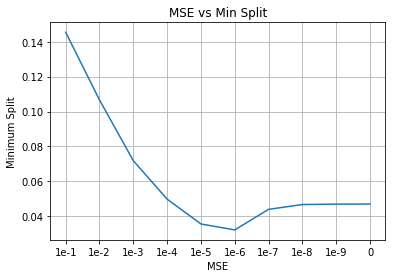

In [79]:
min_split = ['1e-1', '1e-2', '1e-3', '1e-4', '1e-5', '1e-6', '1e-7', '1e-8', '1e-9', '0']

plt.plot(min_split, score)
plt.xlabel('MSE')
plt.ylabel('Minimum Split')
plt.grid()
plt.title('MSE vs Min Split')
plt.show()

1e-6 is the best.  

In [80]:
score = []
j = 0
max_depth_ = [i*10000 for i in range(1,22,2)]
max_depth_.append(None)
y_labels = ['bullet','monthly','weekly','irregular']
for j in range(len(max_depth_)):
    
    model = DecisionTreeRegressor(min_impurity_decrease = 1e-6, max_depth = max_depth_[j])
    
    ALL_TRUE_LABEL = []
    ALL_PRED_LABEL = []
    ALL_TRUE_VALUE = []
    ALL_PRED_VALUE = []
    kf = KFold(n_splits=10)
    i = 0
    for train_index, test_index in kf.split(X):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]


        model.fit(X_train,y_train)    
        y_pred = model.predict(X_test)

        y_test_label = [convert(row, y_labels) for row in y_test.values.tolist()]
        y_pred_label = [convert(row, y_labels) for row in y_pred]

        ALL_PRED_LABEL.extend(y_pred_label)
        ALL_TRUE_LABEL.extend(y_test_label)
        ALL_PRED_VALUE.extend(y_pred)
        ALL_TRUE_VALUE.extend(y_test.values.tolist())

        # Screen Output for tracking the progress, sometimes I wait too long......
        print('Finish Test Iteration ',i)
        i += 1
#         break
        
    score.append(mean_squared_error(ALL_TRUE_VALUE, ALL_PRED_VALUE))
    print('Finish Subset Iteration ',j)    
#     break

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Subset Iteration  0
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Subset Iteration  1
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Subset Iteration  2
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iterati

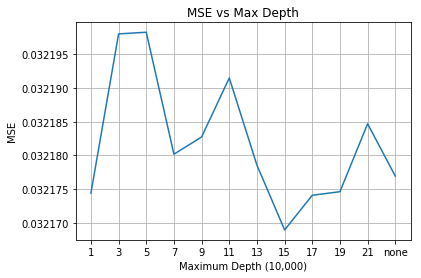

In [84]:
max_depth = [i for i in range(1,22,2)]
max_depth.append('none')

plt.plot(max_depth, score)
plt.xlabel('Maximum Depth (10,000)')
plt.ylabel('MSE')
plt.grid()
plt.title('MSE vs Max Depth')
plt.show()

In [85]:
model = DecisionTreeRegressor(min_impurity_decrease = 1e-6, max_depth =150000)
y_labels = ['bullet','monthly','weekly','irregular']
ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
ALL_TRUE_VALUE = []
ALL_PRED_VALUE = []
kf = KFold(n_splits=10)
i = 0
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    

    model.fit(X_train,y_train)    
    y_pred = model.predict(X_test)
    
    y_test_label = [convert(row, y_labels) for row in y_test.values.tolist()]
    y_pred_label = [convert(row, y_labels) for row in y_pred]
    
    ALL_PRED_LABEL.extend(y_pred_label)
    ALL_TRUE_LABEL.extend(y_test_label)
    ALL_PRED_VALUE.extend(y_pred)
    ALL_TRUE_VALUE.extend(y_test.values.tolist())

    # Screen Output for tracking the progress, sometimes I wait too long......
    print('Finish Test Iteration ',i)
    i += 1
#     break

print(multiclass_regression_report(ALL_TRUE_VALUE, ALL_PRED_VALUE,y_labels))
print(classification_report(ALL_TRUE_LABEL, ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL, ALL_PRED_LABEL))

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
                  r2_score   mean_squared_error   explained_variance_score   support
                                                                                    
         bullet      0.782                0.021                      0.782     70728
        monthly      0.762                0.059                      0.762    342717
         weekly       0.67                  0.0                       0.67       602
      irregular      0.796                0.048                      0.796    257158
                                                                                    
      micro avg        0.0                0.016                        0.0    671205
      macro avg      0.752                0.032                      0

In [86]:
score = []
j = 0
max_features_ = ['sqrt','log2','auto']
y_labels = ['bullet','monthly','weekly','irregular']
for j in range(len(max_features_)):
    
    model = DecisionTreeRegressor(min_impurity_decrease = 1e-6, max_depth = 150000, max_features = max_features_[j])
    
    ALL_TRUE_LABEL = []
    ALL_PRED_LABEL = []
    ALL_TRUE_VALUE = []
    ALL_PRED_VALUE = []
    kf = KFold(n_splits=10)
    i = 0
    for train_index, test_index in kf.split(X):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]


        model.fit(X_train,y_train)    
        y_pred = model.predict(X_test)

        y_test_label = [convert(row, y_labels) for row in y_test.values.tolist()]
        y_pred_label = [convert(row, y_labels) for row in y_pred]

        ALL_PRED_LABEL.extend(y_pred_label)
        ALL_TRUE_LABEL.extend(y_test_label)
        ALL_PRED_VALUE.extend(y_pred)
        ALL_TRUE_VALUE.extend(y_test.values.tolist())

        # Screen Output for tracking the progress, sometimes I wait too long......
        print('Finish Test Iteration ',i)
        i += 1
#         break
        
    score.append(mean_squared_error(ALL_TRUE_VALUE, ALL_PRED_VALUE))
    print('Finish Subset Iteration ',j)    
#     break

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Subset Iteration  0
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Subset Iteration  1
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Subset Iteration  2


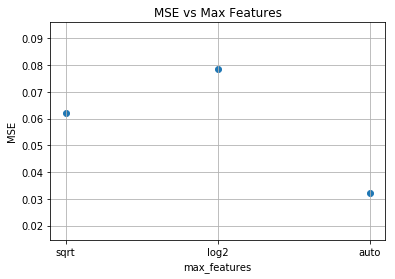

In [87]:
max_features_ = ['sqrt','log2','auto']

plt.scatter(max_features_, score)
plt.xlabel('max_features')
plt.ylabel('MSE')
plt.grid()
plt.title('MSE vs Max Features')
plt.show()